In [20]:
using Pkg
Pkg.activate("demo_julia_env") # Activate the environment
using Lux, ADTypes, LuxCUDA, Optimisers, Printf, Random, Statistics, Zygote, Plots

  Activating project at `~/julia_oscar_test/demo_julia_env`


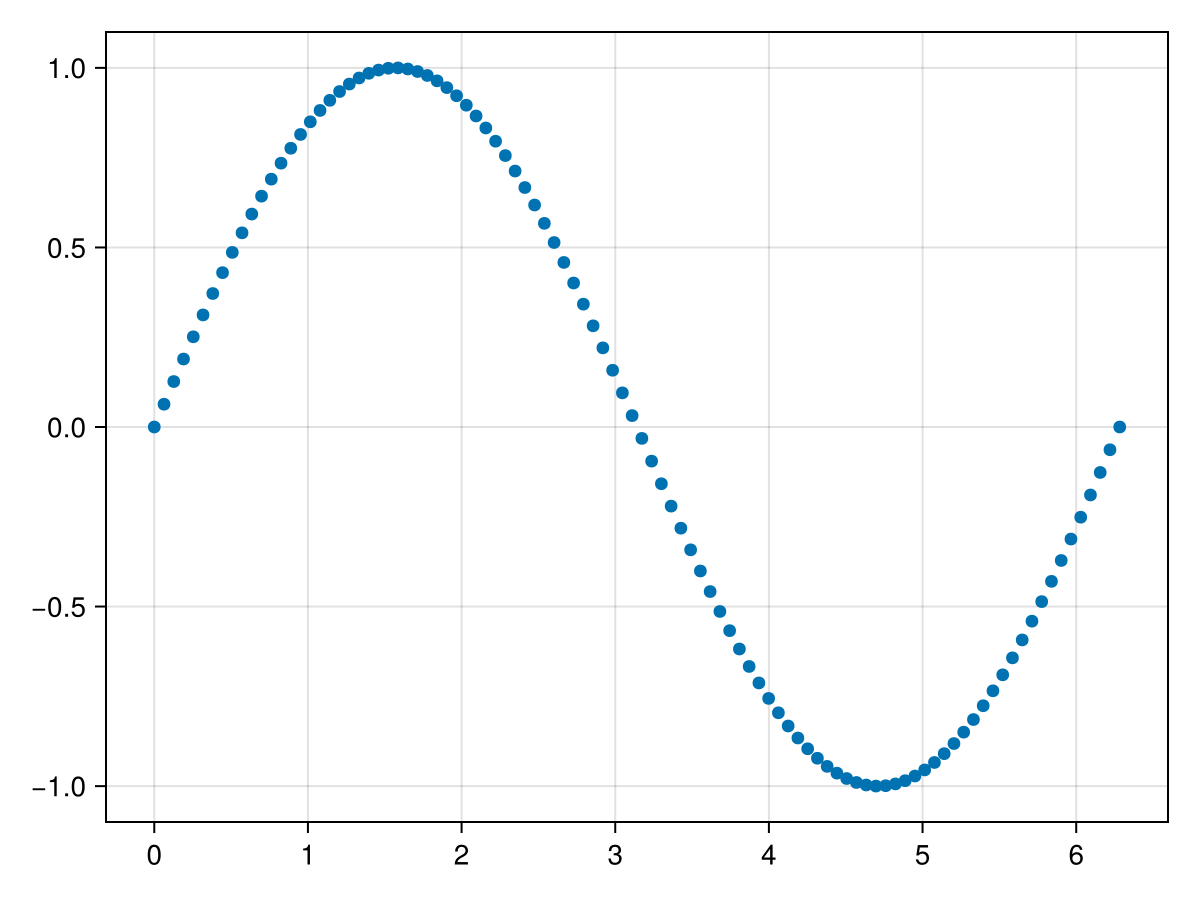

In [31]:

function generate_data(x) 
    return sin.(x)
end

x = collect(range(0,  2π, 100))
y = generate_data(x)
plot(x, y)


In [32]:
model = Chain(Dense(1 => 16, atan), Dense(16 => 1))

Chain(
    layer_1 = Dense(1 => 16, atan),     # 32 parameters
    layer_2 = Dense(16 => 1),           # 17 parameters
)         # Total: 49 parameters,
          #        plus 0 states.